# 数据分析期末项目
## 项目: 预测三亚市气温状况
## 1.分析数据
在项目的第一个部分，我对data_weather数据进行初步的观察并给出分析。通过对数据的探索来熟悉数据可以让更好地解释结果。

由于这个项目的最终目标是建立一个预测气温的模型，需要将数据集分为**特征(features)**和**目标变量(target variable)**。**特征** `'date'`， `'temp_h'`，`'temp_l'`，`'temp_diff'`，和 `'weather'`，`'wind_power'`，`'wind_direction'`，给我们提供了每个数据点的数量相关的信息。**目标变量**：` 'temp_avr'`，是我们希望预测的变量。他们分别被存在`features`和`temp`两个变量名中。

In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
from scipy import  stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

In [2]:
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
weather = pd.read_csv('weather.csv')

### 1.1查看原始数据

In [4]:
df = pd.DataFrame(weather)
df = df.dropna()
df.head()

,1,三亚,2015/7/1,33,28,多云,西南风,3-4级
0,2,三亚,2015/7/2,34,28,多云,西南风,3-4级
1,3,三亚,2015/7/3,34,28,多云,西南风,3-4级
2,4,三亚,2015/7/4,35,28,多云,西南风,3-4级
3,5,三亚,2015/7/5,33,27,雷雨~多云,西北风,3-4级
4,6,三亚,2015/7/6,33,28,雷雨~多云,西北风,3-4级


### 1.2添加列名

In [5]:
df.columns = ['No', 'city', 'date', 'temp_h', 'temp_l','weather','wind_direction','wind_power']

In [6]:
df_sanya = df.loc[df.city == '三亚']
df_sanya.head()

,No,city,date,temp_h,temp_l,weather,wind_direction,wind_power
0,2,三亚,2015/7/2,34,28,多云,西南风,3-4级
1,3,三亚,2015/7/3,34,28,多云,西南风,3-4级
2,4,三亚,2015/7/4,35,28,多云,西南风,3-4级
3,5,三亚,2015/7/5,33,27,雷雨~多云,西北风,3-4级
4,6,三亚,2015/7/6,33,28,雷雨~多云,西北风,3-4级


### 1.3统计三亚市2015-2016年出现的天气状况

In [7]:
from collections import Counter
Counter(df_sanya['weather'])

Counter({'多云': 346,
         '雷雨~多云': 2,
         '阵雨~多云': 6,
         '多云~阵雨': 3,
         '大到暴雨': 7,
         '大到暴雨~阵雨': 1,
         '多云~雷阵雨': 7,
         '阵雨': 34,
         '中雨~阵雨': 1,
         '雷阵雨~多云': 10,
         '雷阵雨': 26,
         '大雨~阵雨': 1,
         '中雨~多云': 1,
         '大雨~雷阵雨': 1,
         '大雨~大到暴雨': 1,
         '大雨': 7,
         '小到中雨': 6,
         '小到中雨~多云': 1,
         '阵雨~大到暴雨': 1,
         '雷阵雨~阵雨': 1,
         '中到大雨': 4,
         '中到大雨~阵雨': 1,
         '晴~多云': 1,
         '多云~阴': 1,
         '阴~多云': 1,
         '阴': 3,
         '多云~小雨': 10,
         '小雨': 8,
         '小雨~阴': 1,
         '小雨~多云': 2,
         '晴': 2,
         '晴~阴': 1,
         '雷阵雨~小雨': 1,
         '雷阵雨转多云': 1,
         '多云转阵雨': 2,
         '暴雨': 6,
         '中雨': 2})

In [8]:
weather_condition = {'多云': 346,
         '雷雨~多云': 2,
         '阵雨~多云': 6,
         '多云~阵雨': 3,
         '大到暴雨': 7,
         '大到暴雨~阵雨': 1,
         '多云~雷阵雨': 7,
         '阵雨': 34,
         '中雨~阵雨': 1,
         '雷阵雨~多云': 10,
         '雷阵雨': 26,
         '大雨~阵雨': 1,
         '中雨~多云': 1,
         '大雨~雷阵雨': 1,
         '大雨~大到暴雨': 1,
         '大雨': 7,
         '小到中雨': 6,
         '小到中雨~多云': 1,
         '阵雨~大到暴雨': 1,
         '雷阵雨~阵雨': 1,
         '中到大雨': 4,
         '中到大雨~阵雨': 1,
         '晴~多云': 1,
         '多云~阴': 1,
         '阴~多云': 1,
         '阴': 3,
         '多云~小雨': 10,
         '小雨': 8,
         '小雨~阴': 1,
         '小雨~多云': 2,
         '晴': 2,
         '晴~阴': 1,
         '雷阵雨~小雨': 1,
         '雷阵雨转多云': 1,
         '多云转阵雨': 2,
         '暴雨': 6,
         '中雨': 2}

In [9]:
plt.figure(figsize=(20,20))
label = weather_condition.keys()

<Figure size 1440x1440 with 0 Axes>

In [10]:
values = weather_condition.values()

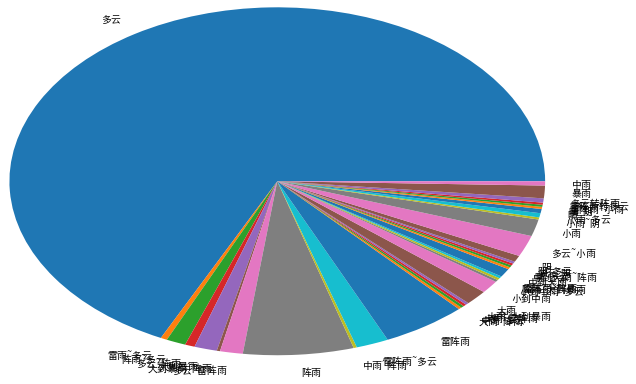

In [11]:
plt.pie(values,labels=label,radius=2);

#### 三亚市天气情况饼状图

### 1.4三亚市气温变化情况

In [12]:
x = df_sanya['date']

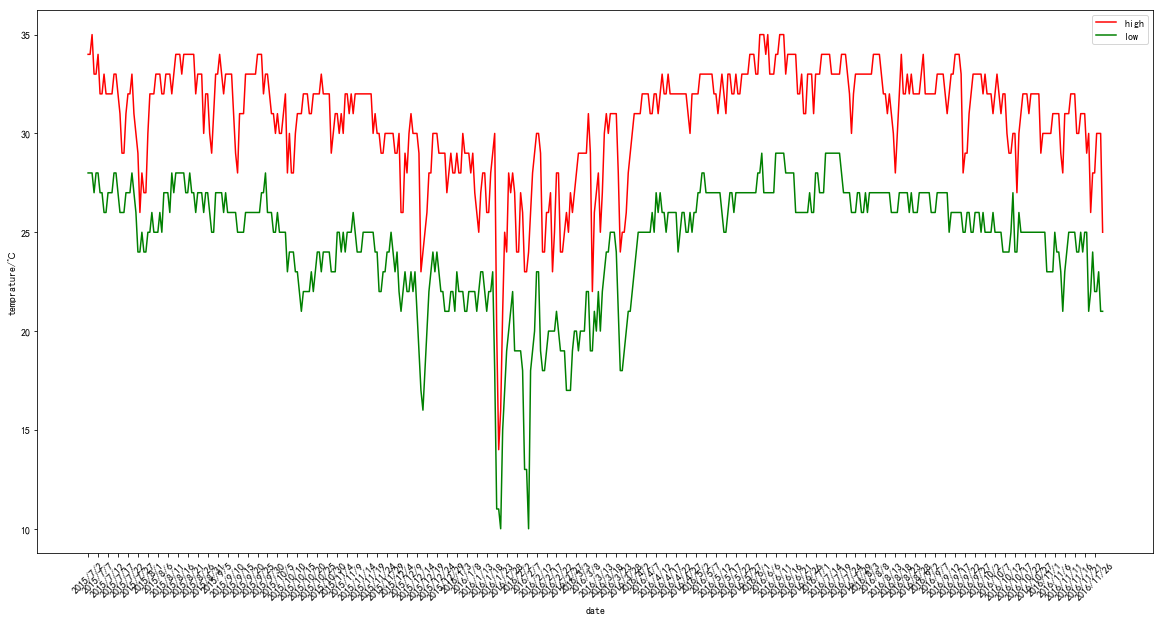

In [13]:
y2 = df_sanya['temp_h']
y3 = df_sanya['temp_l']
plt.figure(figsize=(20,10))
plt.plot(
            x, y2,'r-',
            x,y3,'g-');
plt.legend(['high','low'])
plt.xlabel('date')
plt.ylabel('temprature/℃')
plt
plt.xticks(range(0,510,5),rotation = 45);
plt.savefig('temp.png')
plt.show()

#### 2015年7月-2016年11月三亚市气温(High、Low)变化折线图

## 2.基础统计运算
### 2.1计算有关三亚市平均气温的描述统计数据。


In [15]:
#用平均气温代表一天天气
temp= (df_sanya['temp_h'] + df_sanya['temp_l'])*0.5

#目标：计算天气的最小值
minimum_temp = np.min(temp)


#目标：计算天气的最大值
maximum_temp = np.max(temp)


#目标：计算天气的平均值
mean_temp = np.mean(temp)


#目标：计算天气的中值
median_temp = np.median(temp)


#目标：计算天气的标准差
std_temp = np.std(temp)


#目标：输出计算的结果
print ("Statistics for data_weather dataset:\n")
print ("Minimum temperature: {:,.2f}℃".format(minimum_temp))
print ("Maximum temperature: {:,.2f}℃".format(maximum_temp))
print ("Mean temperature: {:,.2f}℃".format(mean_temp))
print ("Median temperature {:,.2f}℃".format(median_temp))
print ("Standard deviation of temperature: {:,.2f}℃".format(std_temp))

Statistics for data_weather dataset:

Minimum temperature: 12.50℃
Maximum temperature: 32.00℃
Mean temperature: 27.64℃
Median temperature 28.50℃
Standard deviation of temperature: 2.84℃


### 2.2三亚市风力情况

In [17]:
alist = []
for item in df_sanya['wind_power']:
    if item not in alist:
        alist.append(item)
print(alist)

['3-4级', '1级', '2级', '3级', '微风', '4级']


## 3.建模
利用基本的skit-learn进行建模

### 3.1定义衡量标准
如果不能对模型的训练和测试的表现进行量化地评估，我们就很难衡量模型的好坏。通常我们会定义一些衡量标准，这些标准可以通过对某些误差或者拟合程度的计算来得到。通过运算[*决定系数*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination)R<sup>2</sup> 来量化模型的表现。模型的决定系数是回归分析中十分常用的统计信息，经常被当作衡量模型预测能力好坏的标准。

R<sup>2</sup>的数值范围从0至1，表示**目标变量**的预测值和实际值之间的相关程度平方的百分比。一个模型的R<sup>2</sup> 值为0说明它完全无法预测目标变量；而一个R<sup>2</sup> 值为1的模型则可以对目标变量进行完美的预测。从0至1之间的数值，则表示该模型中目标变量中有百分之多少能够用**特征**来解释。_模型也可能出现负值的R<sup>2</sup>，这种情况下模型所做预测还不如直接计算目标变量的平均值。

下方代码的 `performance_metric` 函数中，实现了：
- 使用 `sklearn.metrics` 中的 `r2_score` 来计算 `y_true` 和 `y_predict`的R<sup>2</sup>值，作为对其表现的评判。
- 将评分储存到`score`变量中。

In [52]:
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    from sklearn.metrics import r2_score
    
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true,y_predict)
    
    # Return the score
    return score

### 3.2添加新特征


#### 3.2.1查看现有数据

In [21]:
df_sanya.head()

,No,city,date,temp_h,temp_l,weather,wind_direction,wind_power
0,2,三亚,2015/7/2,34,28,多云,西南风,3-4级
1,3,三亚,2015/7/3,34,28,多云,西南风,3-4级
2,4,三亚,2015/7/4,35,28,多云,西南风,3-4级
3,5,三亚,2015/7/5,33,27,雷雨~多云,西北风,3-4级
4,6,三亚,2015/7/6,33,28,雷雨~多云,西北风,3-4级


#### 3.2.2添加新数据

In [22]:
temp_diff = df_sanya['temp_h'] - df_sanya['temp_l']
temp_avr = (df_sanya['temp_h'] + df_sanya['temp_l'])*0.5
df_sanya.insert(3,'temp_diff',temp_diff)
df_sanya.insert(4,'temp_avr',temp_avr)

#### 3.2.3设定features和labels

In [23]:
feature = df_sanya.drop('temp_avr',axis=1)
feature = df_sanya.drop('date',axis = 1)
temp = df_sanya['temp_avr']

###  3.3数据分割与重排
把三亚市天气数据集分成训练和测试两个子集
在下面的代码中：
- 使用 `sklearn.cross_validation` 中的 `train_test_split`， 将`features`和`prices`的数据都分成用于训练的数据子集和用于测试的数据子集。
  - 分割比例为：80%的数据用于训练，20%用于测试；
  - 选定一个数值以设定 `train_test_split` 中的 `random_state` ，这会确保结果的一致性；
- 最终分离出的子集为`X_train`,`X_test`,`y_train`,和`y_test`。

In [24]:
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test =train_test_split(feature, temp, test_size = 0.8, random_state = 0)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


D:\Software\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)



## 4.分析模型的表现


### 4.1学习曲线
下方区域内的代码会输出四幅图像，它们是一个决策树模型在不同最大深度下的表现。每一条曲线都直观的显示了随着训练数据量的增加，模型学习曲线的训练评分和测试评分的变化。曲线的阴影区域代表的是该曲线的不确定性（用标准差衡量）。这个模型的训练和测试部分都使用决定系数R<sup>2</sup>来评分。

In [29]:
import visuals as vs 

In [33]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(feature, temp);

ValueError: could not convert string to float: '3-4级'

<Figure size 720x504 with 0 Axes>

In [28]:
df_sanya.head()

,No,city,date,temp_diff,temp_avr,temp_h,temp_l,weather,wind_direction,wind_power
0,2,三亚,2015/7/2,6,31.0,34,28,多云,西南风,3-4级
1,3,三亚,2015/7/3,6,31.0,34,28,多云,西南风,3-4级
2,4,三亚,2015/7/4,7,31.5,35,28,多云,西南风,3-4级
3,5,三亚,2015/7/5,6,30.0,33,27,雷雨~多云,西北风,3-4级
4,6,三亚,2015/7/6,5,30.5,33,28,雷雨~多云,西北风,3-4级


### 4.2将wind_power 进行 数字量化 并保存为sanya.xls

In [31]:
sanya = pd.read_excel('sanya.xls')
sanya.head()

,city,date,temp_h,temp_l,weather,wind_direction,wind_power
0,三亚,2015/7/2,34,28,多云,西南风,3.5
1,三亚,2015/7/3,34,28,多云,西南风,3.5
2,三亚,2015/7/4,35,28,多云,西南风,3.5
3,三亚,2015/7/5,33,27,雷雨~多云,西北风,3.5
4,三亚,2015/7/6,33,28,雷雨~多云,西北风,3.5


### 4.3量化文字描述

In [36]:
sanya  = sanya.replace('多云',1)

In [37]:
sanya  = sanya.replace('雷雨~多云',2)

In [38]:
sanya = sanya.replace('阵雨~多云',3)
sanya =sanya.replace('多云~阵雨',4)
sanya =sanya.replace('大到暴雨',5)
sanya =sanya.replace('大到暴雨~阵雨',6)
sanya =sanya.replace('多云~雷阵雨',7)
sanya =sanya.replace('阵雨',8)
sanya =sanya.replace('中雨~阵雨',9)
sanya =sanya.replace('雷阵雨~多云',10)
sanya =sanya.replace('雷阵雨',11)
sanya =sanya.replace('大雨~阵雨',12)
sanya =sanya.replace('中雨~多云',13)
sanya =sanya.replace('大雨~雷阵雨',14)
sanya =sanya.replace('大雨~大到暴雨',15)
sanya =sanya.replace( '大雨',17)
sanya =sanya.replace('小到中雨',16)
sanya =sanya.replace('小到中雨~多云',18)
sanya =sanya.replace('阵雨~大到暴雨',19)
sanya =sanya.replace('雷阵雨~阵雨',20)
sanya =sanya.replace('中到大雨',21)
sanya =sanya.replace('中到大雨~阵雨',22)
sanya =sanya.replace('晴~多云',23)
sanya =sanya.replace('多云~阴',24)
sanya =sanya.replace('阴~多云',25)
sanya =sanya.replace('阴',26)
sanya =sanya.replace('多云~小雨',27)
sanya =sanya.replace('小雨',28)
sanya =sanya.replace('小雨~阴',29)
sanya =sanya.replace('小雨~多云',30)
sanya =sanya.replace('晴',31)
sanya =sanya.replace('晴~阴',32)
sanya =sanya.replace('雷阵雨~小雨', 33)
sanya =sanya.replace('雷阵雨转多云',34)
sanya =sanya.replace('多云转阵雨',35)
sanya =sanya.replace('暴雨',36)
sanya =sanya.replace('中雨',37)

In [39]:
sanya.pop('city');

In [40]:
list = []
for each in sanya['wind_direction']:
    if each not in list:
        list.append(each)
print(list)

['西南风', '西北风', '东北风', '东南风', '南风', '东风', '西风', '北风']


In [41]:
sanya = sanya.replace('东风',1)
sanya =sanya.replace('西风',2)
sanya =sanya.replace('南风',3)
sanya =sanya.replace('北风',4)
sanya =sanya.replace('东北风',5)
sanya =sanya.replace('东南风',6)
sanya =sanya.replace('西北风',7)
sanya =sanya.replace('西南风',8)

In [42]:
temp_diff = sanya['temp_h'] - sanya['temp_l']
temp_avr = (sanya['temp_h'] + sanya['temp_l'])*0.5

In [43]:
sanya.insert(3,'temp_diff',temp_diff)
sanya.insert(4,'temp_avr',temp_avr)

sanya.head()

,date,temp_h,temp_l,temp_diff,temp_avr,weather,wind_direction,wind_power
0,2015/7/2,34,28,6,31.0,1,8,3.5
1,2015/7/3,34,28,6,31.0,1,8,3.5
2,2015/7/4,35,28,7,31.5,1,8,3.5
3,2015/7/5,33,27,6,30.0,2,7,3.5
4,2015/7/6,33,28,5,30.5,2,7,3.5


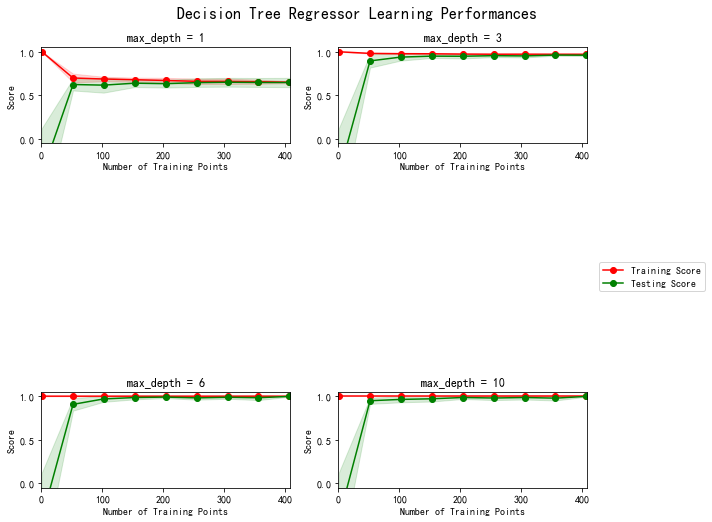

In [44]:
feature = sanya.drop('temp_avr',axis=1)
feature = sanya.drop('date',axis = 1)
temp =sanya['temp_avr']
vs.ModelLearning(feature, temp)

### 4.4复杂度曲线
下列代码内的区域会输出一幅图像，它展示了一个已经经过训练和验证的决策树模型在不同最大深度条件下的表现。这个图形将包含两条曲线，一个是训练的变化，一个是测试的变化。跟**学习曲线**相似，阴影区域代表该曲线的不确定性，模型训练和测试部分的评分都用的 `performance_metric` 函数。

In [46]:
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test =train_test_split(feature, temp, test_size = 0.8, random_state = 0)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


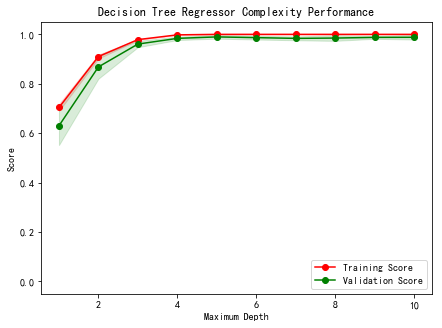

In [47]:
vs.ModelComplexity(X_train, y_train)

-----

## 5评价模型表现
这个项目的最后，建立决策树模型，利用最优化的`fit_model`函数，基于天气的特征来预测三亚市温度。

### 5.1网格搜索

 **网格搜索法算法就是通过交叉验证的方法去寻找最优的模型参数。 网格搜索法是指定参数值的一种穷举搜索方法，通过将估计函数的参数通过交叉验证的方法进行优化来得到最优的学习算法。**

### 5.2交叉验证

**交叉验证(Cross-validation)主要用于建模应用中，例如PCR 、PLS 回归建模中。在给定的建模样本中，拿出大部分样本进行建模型，留小部分样本用刚建立的模型进行预报，并求这小部分样本的预报误差，记录它们的平方加和。** 

**好处是可以从有限的数据中获得尽可能多的有效信息，从而可以从多个角度去学习样本，避免陷入局部的极值。在这个过程中，无论是训练样本还是测试样本都得到了尽可能多的学习。 **

### 5.3训练模型
使用**决策树演算法**训练一个模型。为了保证得出的是一个最优模型，我们使用网格搜索法训练模型，以找到最佳的 `'max_depth'` 参数。
在下方 `fit_model` 函数中，实现了：
- 使用  `sklearn.tree` 中的 [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) 创建一个决策树的回归函数；
  - 并将这个回归函数储存到 `'regressor'` 变量中；
- 为 `'max_depth'` 创造一个字典，它的值是从1至10的数组，并储存到 `'params'` 变量中；
- 使用 `sklearn.metrics` 中的 [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html)  创建一个评分函数；
  - 将 `performance_metric` 作为参数传至这个函数中；
  - 将评分函数储存到 `'scoring_fnc'` 变量中；
- 使用 `sklearn.grid_search` 中的 [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) 创建一个网格搜索对象；
  - 将变量`'regressor'`, `'params'`, `'scoring_fnc'`, 和 `'cv_sets'` 作为参数传至这个对象中；
  - 将 `GridSearchCV` 存到 `'grid'` 变量中。

In [48]:

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor 
    from sklearn import tree
    regressor = tree.DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    from sklearn import metrics
    scoring_fnc = metrics.make_scorer(performance_metric)

    # TODO: Create the grid search object
    from sklearn import grid_search
    grid = grid_search.GridSearchCV(estimator = regressor, param_grid = params, scoring = scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### 5.4最优模型
决策树回归函数代入训练数据的集合，以得到最优化的模型。

In [56]:
# Fit the training data to the model using grid search
from sklearn.cross_validation import ShuffleSplit
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("参数 'max_depth' = {}最适合模型.".format(reg.get_params()['max_depth']))

参数 'max_depth' = 8最适合模型.


## 5.5反思
[`随机森林调参小结`](https://www.cnblogs.com/pinard/p/6160412.html?tdsourcetag=s_pctim_aiomsg)

   ## 6.时间序列分析

- 时间序列与时间序列分析：

  在生产和科学研究中，对某一个或者一组变量 x(t)x(t) 进行观察测量，将在一系列时刻 t1,t2,⋯,tnt1,t2,⋯,tn 所得到的离散数字组成的序列集合，称之为时间序列。 

  时间序列分析是根据系统观察得到的时间序列数据，通过曲线拟合和参数估计来建立数学模型的理论和方法。

### ARIMA模型
#### 平稳性：平稳性要求的是经由样本时间序列所得到的拟合曲线
在未来的一段时间内能顺着现有的形态“惯性”地延续下去
平稳性要求序列的均值不发生明显的变化
#### 数据发生较大波动可以采用差分法
#### 一阶差分：时间序列在t， t-1时刻的差值
#### 二阶差分：在异界差分基础上一阶差分

### 6.1将时间序列转变为索引

In [58]:
sanya.index = sanya['date']
sanya  = sanya.drop('date',axis = 1)
rng = pd.date_range('2015/7/2','2016/11/22')
sanya.index = rng
sanya

,temp_h,temp_l,temp_diff,temp_avr,weather,wind_direction,wind_power
2015-07-02,34,28,6,31.0,1,8,3.5
2015-07-03,34,28,6,31.0,1,8,3.5
2015-07-04,35,28,7,31.5,1,8,3.5
2015-07-05,33,27,6,30.0,2,7,3.5
2015-07-06,33,28,5,30.5,2,7,3.5
2015-07-07,34,28,6,31.0,1,5,3.5
2015-07-08,32,27,5,29.5,1,5,3.5
2015-07-09,32,27,5,29.5,1,5,3.5
2015-07-10,33,26,7,29.5,1,5,3.5
2015-07-11,32,26,6,29.0,1,6,3.5


### 6.2平均气温的重采样 
#### 数据重采样：时间数据有一种转化率到另一种转化率

In [59]:
#按照周
weather_week = sanya['temp_avr'].resample('W').mean()
weather_week.head(10)

2015-07-05    30.875000
2015-07-12    29.785714
2015-07-19    29.357143
2015-07-26    29.000000
2015-08-02    26.428571
2015-08-09    29.000000
2015-08-16    30.214286
2015-08-23    30.714286
2015-08-30    29.571429
2015-09-06    29.000000
Freq: W-SUN, Name: temp_avr, dtype: float64

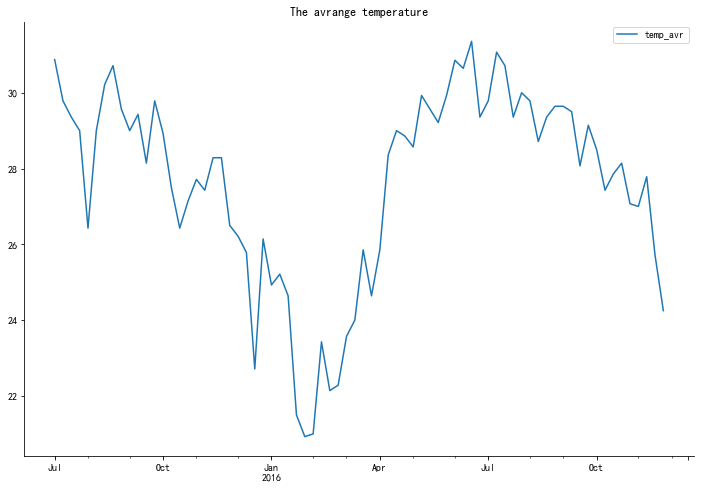

In [60]:
#查看当前数据
import seaborn as sns
import matplotlib.pyplot as plt
weather_week.plot(figsize=(12,8))
plt.legend(loc = "upper right")
plt.title("The avrange temperature")
sns.despine()

### 6.3时间序列的差分d
##### ARIMA 模型对时间序列的要求是平稳型。因此，当得到一个非平稳的时间序列时，首先要做的即是做时间序列的差分，直到得到一个平稳时间序列。如果对时间序列做d次差分才能得到一个平稳序列，那么可以使用ARIMA(p,d,q)模型，其中d是差分次数。

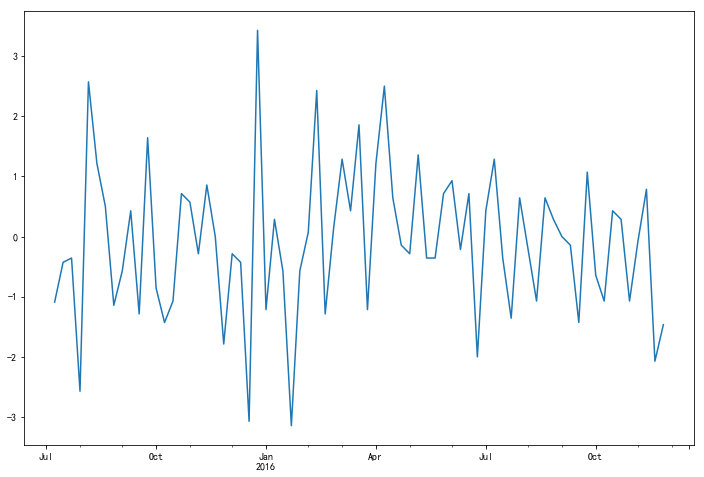

In [61]:
fig = plt.figure(figsize=(12,8))
ax1= fig.add_subplot(111)
diff1 = weather_week.diff(1)
diff1.plot(ax=ax1)

一阶差分的时间序列的均值和方差已经基本平稳，不过我们还是可以比较一下二阶差分的效果

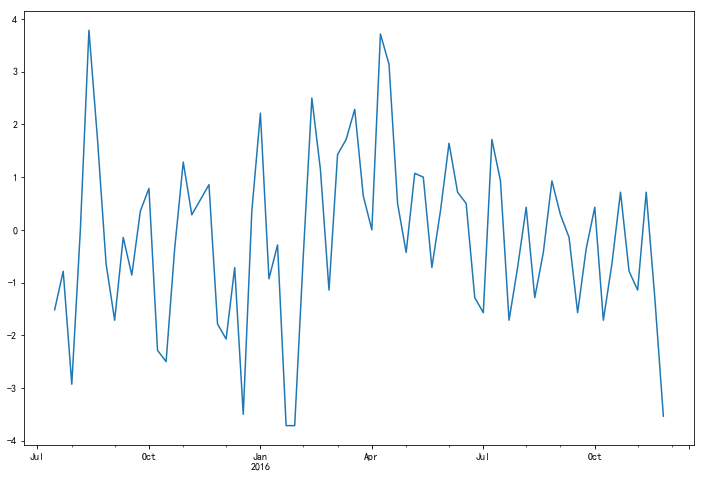

In [62]:
fig = plt.figure(figsize=(12,8))
ax2= fig.add_subplot(111)
diff2 = weather_week.diff(2)
diff2.plot(ax=ax2)

可以看出二阶差分后的时间序列与一阶差分相差不大，并且二者随着时间推移，时间序列的均值和方差保持不变。因此可以将差分次数d设置为1。 

## 7.选择合适的p,q
### 7.1第一步要先查看时间序列的ACF自相关图和PACF偏自相关图

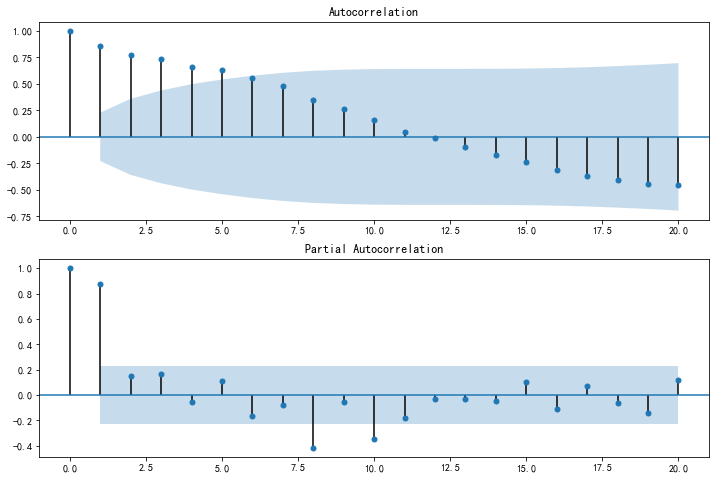

In [63]:
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(weather_week,lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(weather_week,lags=20,ax=ax2)

![辨别方法](阶数确定.jpg)

In [64]:
def tsplot(y, lags = None, title = "", figsize = (14, 8)):
    
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax =plt.subplot2grid(layout, (0, 0))
    hist_ax = plt.subplot2grid(layout, (0, 1))
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (0, 1))
    
    y.plot(ax = ts_ax)
   # ts_ax.set_titile(title)
   # hist_ax.set_titile('Historygram')
    sm.graphics.tsa.plot_acf(y, lags = lags, ax = acf_ax)
    sm.graphics.tsa.plot_pacf(y, lags = lags, ax = pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax,pacf_ax]]
    sns.despine()
    plt.tight_layout()
    return ts_ax, acf_ax, pacf_ax
    

(<matplotlib.axes._subplots.AxesSubplot at 0x1aa23e14c18>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1aa23c09d30>)

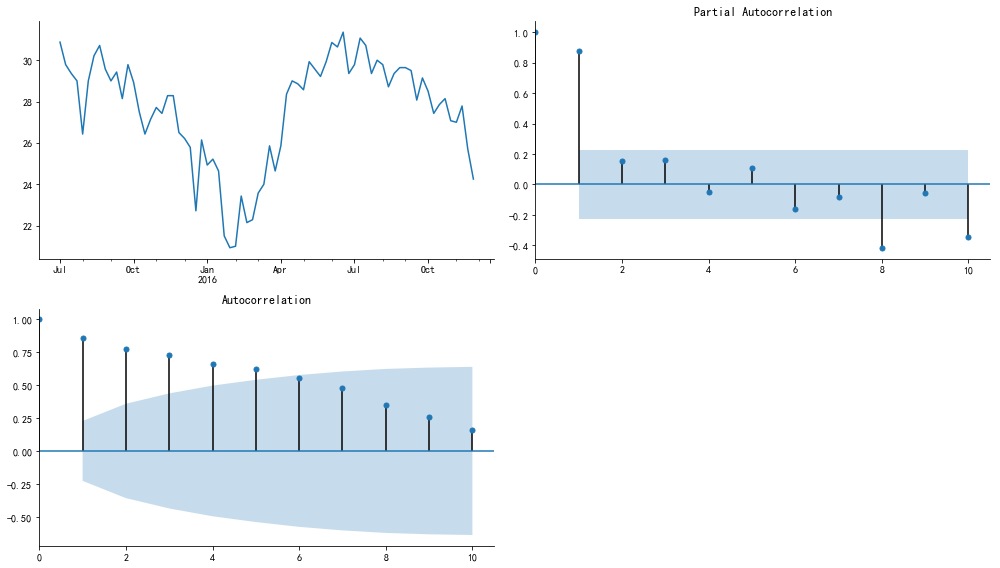

In [65]:
tsplot(weather_week,title='First order difference',lags = 10)

### 7.2模型的筛选
对于模型的选择我们采用了AIC法则。AIC鼓励数据拟合的优良性但是尽量避免出现过度拟合(Overfitting)的情况。所以优先考虑的模型应是AIC值最小的那一个。赤池信息准则的方法是寻找可以最好地解释数据但包含最少自由参数的模型。不仅仅包括AIC准则，目前选择模型常用如下准则： 
* AIC=-2 ln(L) + 2 k 中文名字：赤池信息量 akaike information criterion 
* BIC=-2 ln(L) + ln(n)*k 中文名字：贝叶斯信息量 bayesian information criterion 
* HQ=-2 ln(L) + ln(ln(n))*k hannan-quinn criterion 
构造这些统计量所遵循的统计思想是一致的，就是在考虑拟合残差的同时，依自变量个数施加“惩罚”。但要注意的是，这些准则不能说明某一个模型的精确度，也即是说，对于三个模型Ａ，Ｂ，Ｃ，我们能够判断出Ｃ模型是最好的，但不能保证Ｃ模型能够很好地刻画数据，因为有可能三个模型都是糟糕的。

In [66]:
arma_mod20 = sm.tsa.ARMA(weather_week,(7,0)).fit()
print(arma_mod20.aic,arma_mod20.bic,arma_mod20.hqic)
arma_mod30 = sm.tsa.ARMA(weather_week,(0,1)).fit()
print(arma_mod30.aic,arma_mod30.bic,arma_mod30.hqic)

arma_mod40 = sm.tsa.ARMA(weather_week,(7,1)).fit()
print(arma_mod40.aic,arma_mod40.bic,arma_mod40.hqic)

arma_mod50 = sm.tsa.ARMA(weather_week,(8,0)).fit()
print(arma_mod50.aic,arma_mod50.bic,arma_mod50.hqic)


255.15167694420978 275.8882627830473 263.423755983565
296.8006845526014 303.7128798322139 299.55804423238646
246.57612958850626 269.616780520548 255.76732852112318
249.37747531272805 272.4181262447697 258.56867424534494


246.57612958850626 269.616780520548 255.76732852112318 这一组是最小的 所以选择7，1作为p,q 其实从图中也可以看出来

## 8.模型检验

在指数平滑模型下，观察ARIMA模型的残差是否是平均值为0且方差为常数的正态分布（服从零均值、方差不变的正态分布），同时也要观察连续残差是否（自）相关。

### 8.1我们对ARMA(7,1)模型所产生的残差做自相关图

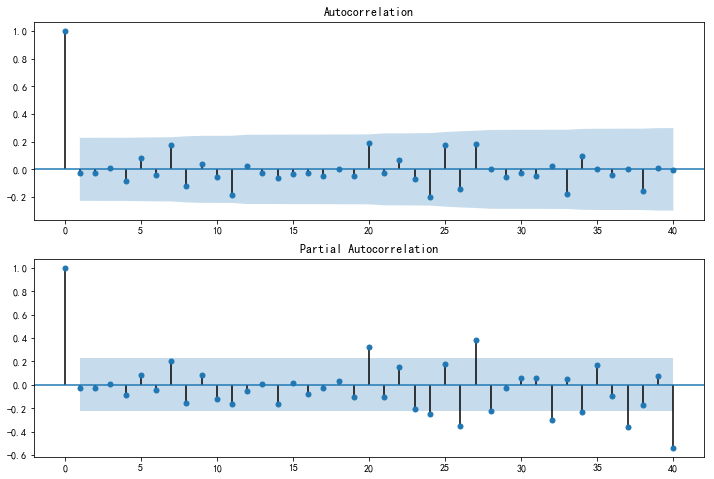

In [67]:
resid = arma_mod40.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)


### 8.2 D-W检验
德宾-沃森（Durbin-Watson）检验。德宾-沃森检验,简称D-W检验，是目前检验自相关性最常用的方法，但它只使用于检验一阶自相关性。因为自相关系数ρ的值介于-1和1之间，所以 0≤DW≤４。并且DW＝O＝＞ρ＝１　　 即存在正自相关性 

In [68]:
print(sm.stats.durbin_watson(arma_mod40.resid.values))

1.9051864411521098


### 8.3观察是否符合正态分布
这里使用QQ图，它用于直观验证一组数据是否来自某个分布，或者验证某两组数据是否来自同一（族）分布。在教学和软件中常用的是检验数据是否来自于正态分布
>QQ图通过把测试样本数据的分位数与已知分布相比较，从而来检验数据的分布情况。QQ图是一种散点图,对应于正态分布的QQ图,就是由标准正态分布的分位数为横坐标,样本值为纵坐标的散点图。要利用QQ图鉴别样本数据是否近似于正态分布,只需看QQ图上的点是否近似地在一条直线附近,图形是直线说明是正态分布，而且该直线的斜率为标准差,截距为均值，用QQ图还可获得样本偏度和峰度的粗略信息。

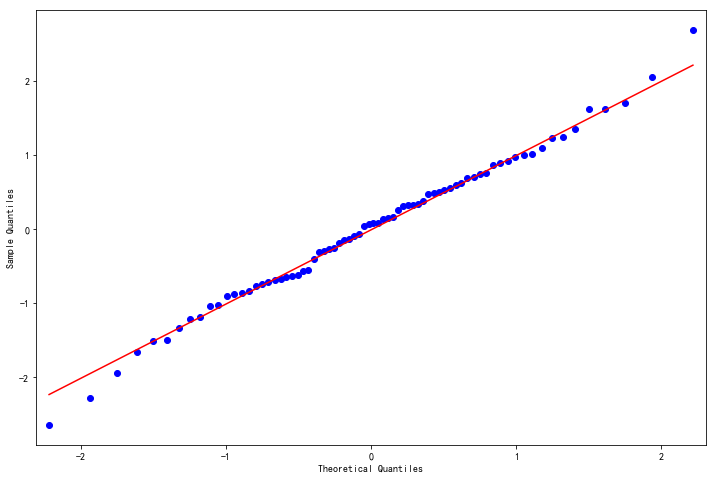

In [70]:
resid = arma_mod20.resid#残差
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

## 模型预测
这个date_to_range()函数传入的参数要求起始在原来数据集里面，末尾没有要求，但是要符合时间戳分片规则，我才用的是按周来分的'W-SUN',选取每个周第一天，所以就选取一个周日计算。今天正好就是

2016-11-27    25.691837
2016-12-04    25.612483
2016-12-11    25.174732
2016-12-18    25.252650
2016-12-25    24.960201
2017-01-01    24.690992
2017-01-08    24.630001
2017-01-15    24.533256
2017-01-22    24.536731
2017-01-29    24.581759
2017-02-05    24.621771
2017-02-12    24.720626
2017-02-19    24.855783
2017-02-26    25.025553
2017-03-05    25.234695
2017-03-12    25.464879
2017-03-19    25.716159
2017-03-26    25.986760
2017-04-02    26.270232
2017-04-09    26.564087
2017-04-16    26.862441
2017-04-23    27.159641
2017-04-30    27.451733
2017-05-07    27.734117
2017-05-14    28.002819
2017-05-21    28.254129
2017-05-28    28.484321
2017-06-04    28.690298
2017-06-11    28.869412
2017-06-18    29.019481
                ...    
2018-10-21    27.001367
2018-10-28    26.892134
2018-11-04    26.791148
2018-11-11    26.699791
2018-11-18    26.619264
2018-11-25    26.550573
2018-12-02    26.494517
2018-12-09    26.451680
2018-12-16    26.422429
2018-12-23    26.406910
2018-12-30    26

D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


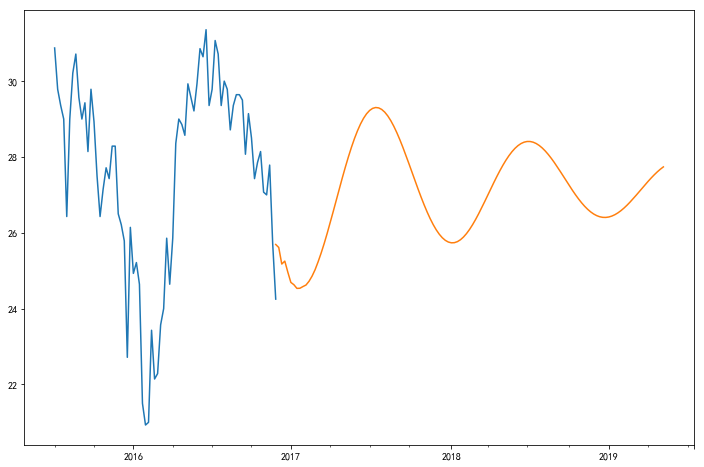

In [72]:
predict_sunspots = arma_mod40.predict('2016-11-27', '2019-5-12', dynamic=True)
print(predict_sunspots)
fig, ax = plt.subplots(figsize=(12, 8))
ax = weather_week.ix['2001':].plot(ax=ax)
predict_sunspots.plot(ax=ax)
